In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [93]:
from sklearn.datasets import make_classification

In [94]:
## Creating Dataset
X,Y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [96]:
## Model Training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [97]:
logistic.fit(X_train,Y_train)

LogisticRegression()

In [98]:
Y_pred=logistic.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.9166666666666666
[[146  11]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Hyperparameter Tuning and Cross Validation

In [101]:
model=LogisticRegression()
penalty=["l1","l2","elasticnet"]
c_values=[100,10,1.0,0.1,0.01]
solver=["newtorn-cg","lbfs","liblinear","sag","saga"]

In [102]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [103]:
from sklearn.model_selection  import StratifiedKFold
cv=StratifiedKFold()

#### GridSearch CV

In [104]:
## Grid Search CV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring="accuracy",cv=cv,n_jobs=1)

In [105]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newtorn-cg', 'lbfs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [106]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newtorn-cg', 'lbfs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [107]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [108]:
grid.best_score_

0.9242857142857142

In [109]:
Y_pred=grid.predict(X_test)

In [110]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#### Randomized SearchCV

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring="accuracy")

In [113]:
randomcv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newtorn-cg', 'lbfs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [114]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}

In [115]:
randomcv.best_score_

0.9214285714285714

In [116]:
Y_pred=randomcv.predict(X_test)

In [117]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.9233333333333333
[[152   5]
 [ 18 125]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       157
           1       0.96      0.87      0.92       143

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



## Logistic Regression For Multi Class Classification

In [118]:
## Creating Dataset
X,Y=make_classification(n_samples=1000,n_features=10,n_classes=3,n_informative=3,random_state=15)

In [119]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [120]:
logistic=LogisticRegression(multi_class="ovr")
logistic.fit(X_train,Y_train)
Y_pred=logistic.predict(X_test)

In [121]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.79
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



## Grid Search CV for multiclass classfication

In [122]:
## Grid Search CV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=logistic,param_grid=params,scoring="accuracy",cv=cv,n_jobs=1)

In [123]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='ovr'), n_jobs=1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newtorn-cg', 'lbfs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [124]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [125]:
grid.best_score_

0.8028571428571428

In [126]:
Y_pred=grid.predict(X_test)

In [127]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.7766666666666666
[[83 11  8]
 [ 4 72 26]
 [ 7 11 78]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.77      0.71      0.73       102
           2       0.70      0.81      0.75        96

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## Randomized Search CV for MultiClass Classification

In [128]:
randomcv=RandomizedSearchCV(estimator=logistic,param_distributions=params,cv=5,scoring="accuracy")

In [129]:
randomcv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newtorn-cg', 'lbfs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [130]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

In [131]:
randomcv.best_score_

0.8028571428571428

In [132]:
Y_pred=randomcv.predict(X_test)

In [133]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.7766666666666666
[[83 11  8]
 [ 4 72 26]
 [ 7 11 78]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.77      0.71      0.73       102
           2       0.70      0.81      0.75        96

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## Logistic Regression For imbalanced Dataset

In [134]:
## Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [135]:
## Imbalanced Dataset
X,Y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [136]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [137]:
Counter(Y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

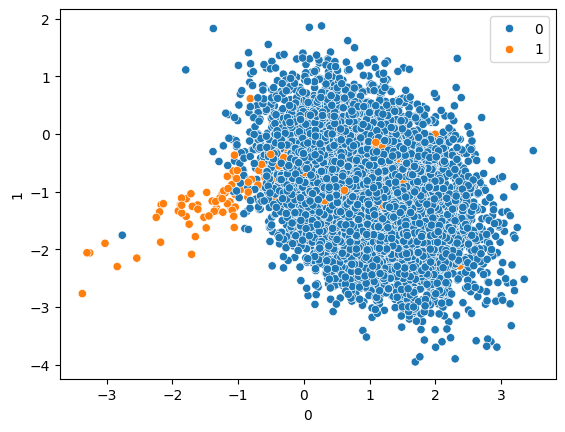

In [138]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=Y)

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [140]:
## Hyper Parameter tuning
model=LogisticRegression()
penalty=["l1","l2","elasticnet"]
c_values=[100,10,1.0,0.1,0.01]
solver=["newtorn-cg","lbfs","liblinear","sag","saga"]
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [141]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [142]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newtorn-cg', 'lbfs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring="accuracy",cv=cv)

In [144]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newtorn-cg', 'lbfs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [145]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'sag'}

In [146]:
grid.best_score_

0.9881333333333334

In [147]:
Y_pred=grid.predict(X_test)

In [148]:
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

0.992
[[2468    2]
 [  18   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500



## Logistic Regression with ROC curve and ROC AUC score

In [149]:
## ROC Curce and AUC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [150]:
X,Y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [151]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [152]:
## Generate a dummy model with default value of 0
dummy_model_prob=[0 for _ in range(len(Y_test))]


In [153]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [154]:
model_prob=model.predict_proba(X_test)

In [155]:
model_prob=model_prob[:,1]

In [156]:
dummy_model_auc=roc_auc_score(Y_test,dummy_model_prob)
model_auc=roc_auc_score(Y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [157]:
## Calculate ROC Curve
dummy_fpr,dummy_tpr,_=roc_curve(Y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds=roc_curve(Y_test,model_prob)

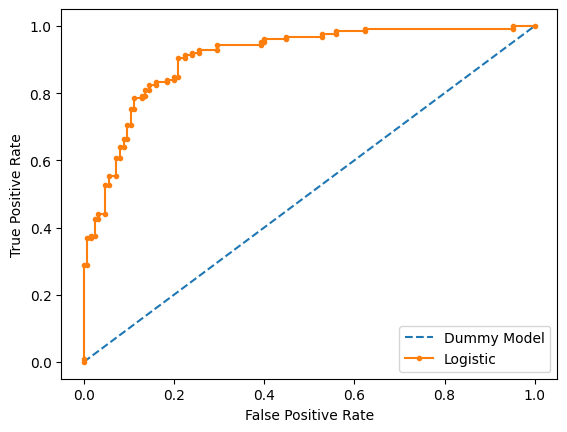

In [158]:
## plot the ROC curve
plt.plot(dummy_fpr,dummy_tpr,linestyle="--",label="Dummy Model")
plt.plot(model_fpr,model_tpr,marker=".",label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

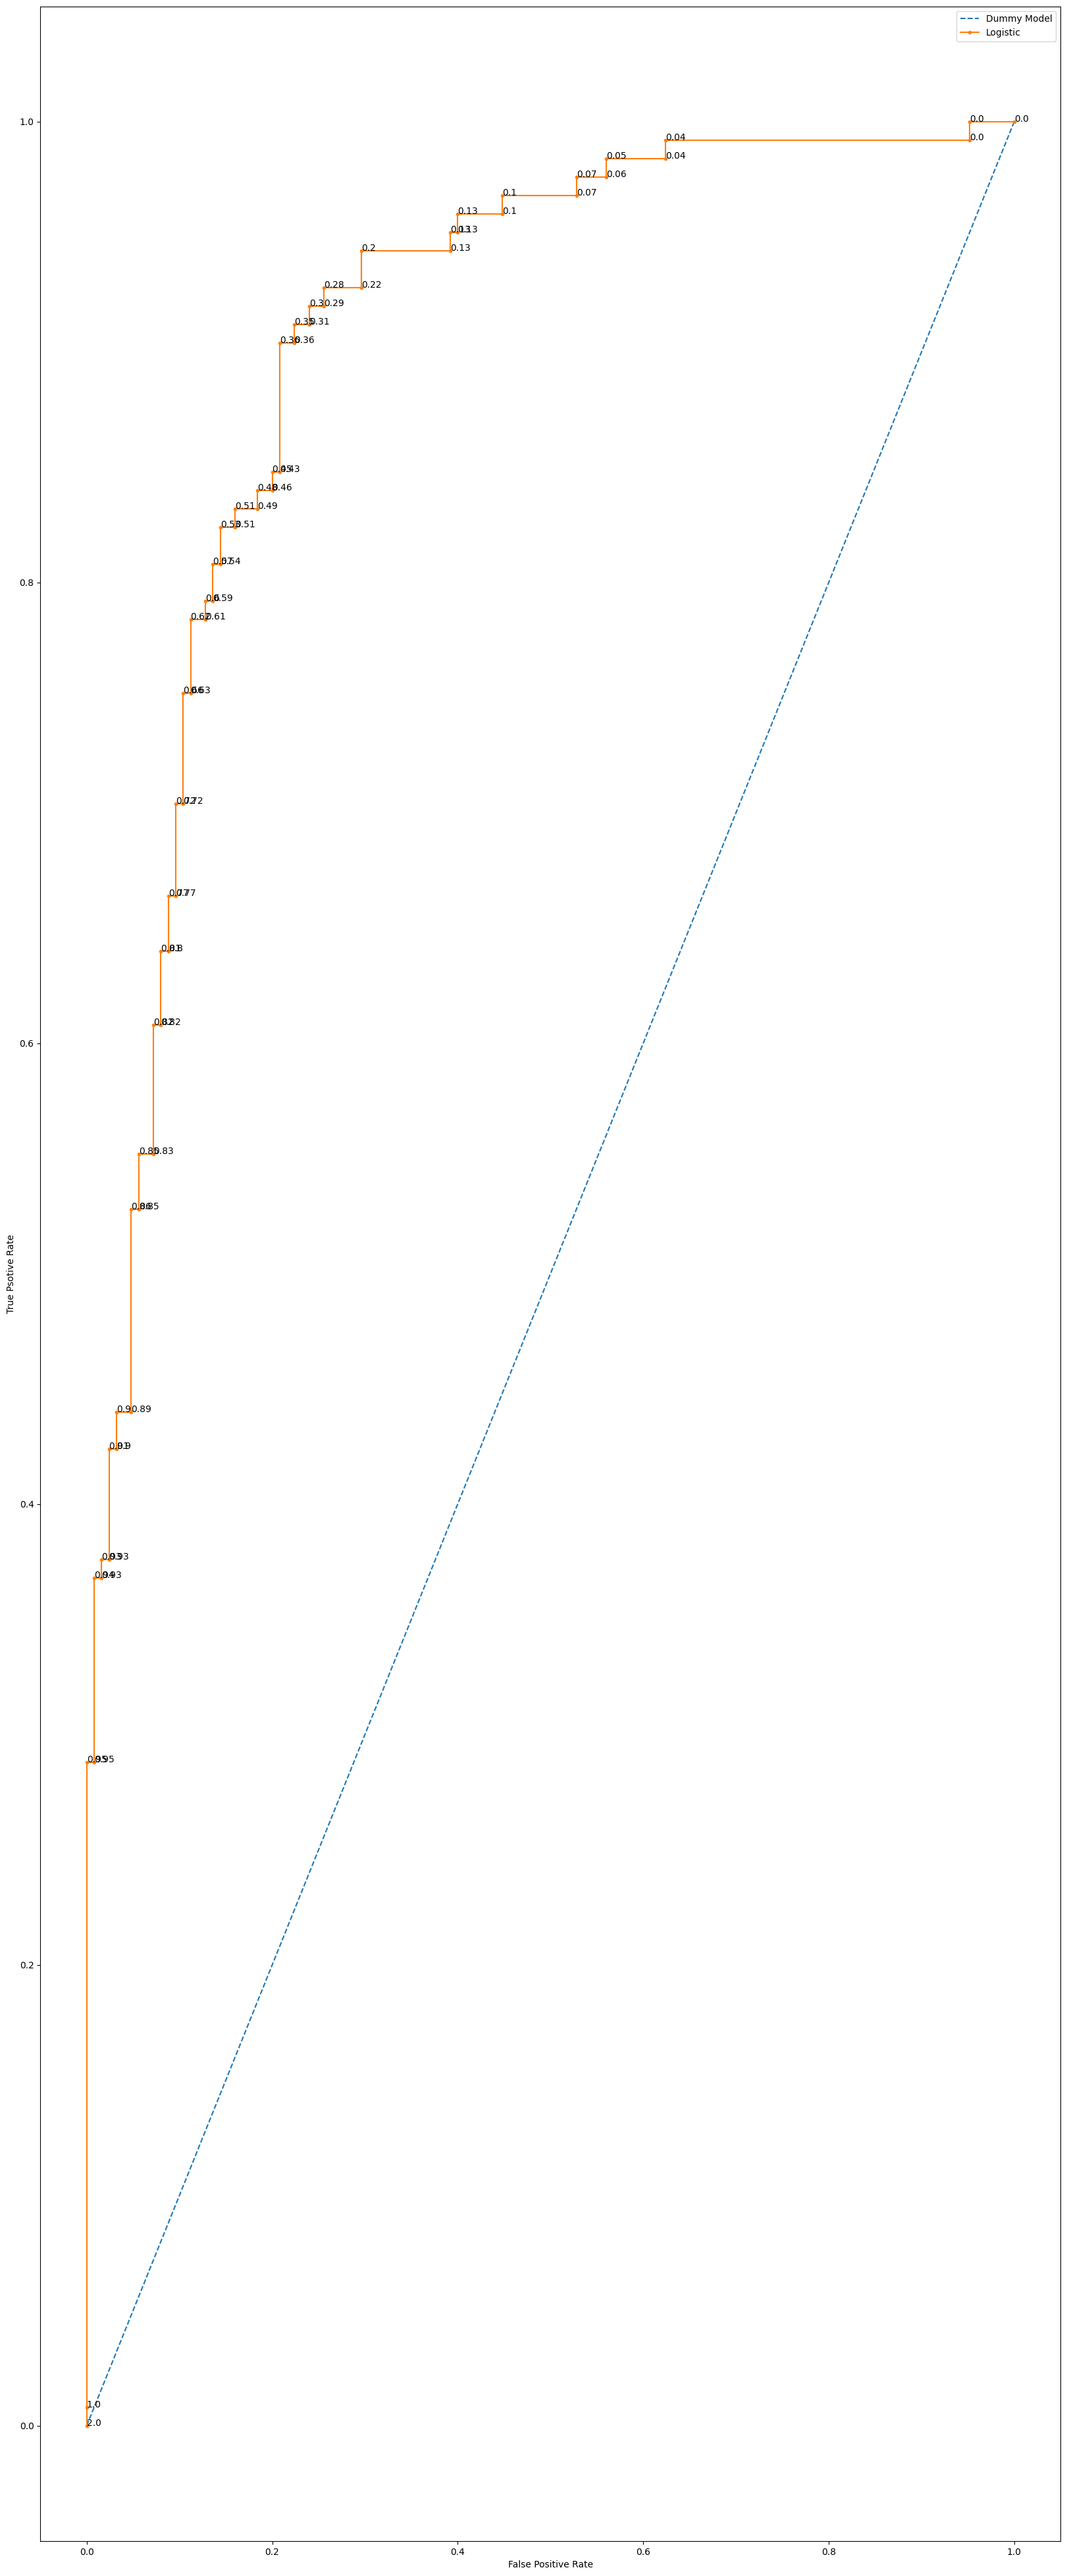

In [159]:
## ROC curve for model
import numpy as np
fig=plt.figure(figsize=(20,50))
ax=fig.add_subplot(111)
plt.plot(dummy_fpr,dummy_tpr,linestyle="--",label="Dummy Model")
plt.plot(model_fpr,model_tpr,marker=".",label="Logistic")

for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate("%s" % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
plt.xlabel("False Positive Rate")
plt.ylabel("True Psotive Rate")
plt.legend()
plt.show()